All Imports

In [ ]:
import random
import time
import requests
from Tools.scripts.win_add2path import modify
from faker import Faker
import matplotlib.pyplot as plt

In [4]:
BASE_URL = "http://localhost:4567"
json_headers = {"Accept": "application/json"}
faker = Faker()
output_dir = "test_metrics/"
session = requests.Session()

In [5]:
def generate_project_data():
    """
    Generate random project data based on the given fields and examples.
    """
    return {
        "title": faker.sentence(nb_words=3),
        "completed": random.choice([True, False]),
        "active": random.choice([True, False]),
        "description": faker.text(max_nb_chars=100)
    }


def generate_todo_data():
    # TODO need to implement
    pass

def generate_category_data():
    return {
        "title": faker.sentence(nb_words=3),
        "description": faker.text(max_nb_chars=100)
    }

In [7]:
def create_random_projects(num_projects):
    """
    Create a specified number of random projects.
    """
    project_ids = []
    for i in range(num_projects):
        project_id, elapsed_time = create_random_project()
        if project_id != 0:
            project_ids.append(project_id)
        else:
            print(f"Failed to create project {i + 1}/{num_projects}")
    return project_ids

def create_random_project():
    """
    Create a single random project.
    """
    project_id = 0 
    project_data = generate_project_data()  # Assumes this function is defined elsewhere
    start_time = time.time()
    response = session.post(
        f"{BASE_URL}/projects",
        json=project_data,
        headers=json_headers
    )
    elapsed_time = time.time() - start_time
    if response.status_code == 201:
        project_id = response.json().get("id", 0)  # Fallback to 0 if "id" is missing
    else:
        print(f"Failed to create project: {response.status_code} - {response.text}")
    return project_id, elapsed_time

def create_random_todos(num_todos):
    # TODO need to implement
    pass
 
def create_random_categories(category_num):
    categories_ids = []
    for i in range(category_num):
        category_id, elapsed_time = create_category()
        if category_id != 0:
            categories_ids.append(category_id)
        else:
            print(f"Failed to create category {i + 1}/{category_num}")
    return categories_ids

def create_category():
    category_id = 0 
    category_data = generate_category_data() 
    start_time = time.time()
    response = session.post(
        f"{BASE_URL}/categories",
        json=category_data,
        headers=json_headers
    )
    elapsed_time = time.time() - start_time
    if response.status_code == 201:
        category_id = response.json().get("id", 0)  # Fallback to 0 if "id" is missing
    else:
        print(f"Failed to create category: {response.status_code} - {response.text}")
    return category_id, elapsed_time

In [8]:
def get_all_projects():
    """
    Fetch all projects and measure the time taken.
    """
    start_time = time.time()
    response = session.get(f"{BASE_URL}/projects", headers=json_headers)
    elapsed_time = time.time() - start_time
    if response.status_code != 200:
        print(f"Failed to fetch projects: {response.status_code} - {response.text}")
    projects = response.json().get('projects', [])
    project_ids = [project.get('id') for project in projects]
    return projects, project_ids, elapsed_time


def get_all_todos():
    return [], [], 0
    # TODO need to implement


def get_all_categories():
    start_time = time.time()
    response = session.get(f"{BASE_URL}/categories", headers=json_headers)
    elapsed_time = time.time() - start_time
    if response.status_code != 200:
        print(f"Failed to fetch categories: {response.status_code} - {response.text}")
    categories = response.json().get('categories', [])
    category_ids = [category.get('id') for category in categories]
    return categories, category_ids, elapsed_time
    


def get_object_count():
    _, project_ids, _ = get_all_projects()
    _, category_ids, _ = get_all_categories()
    _, todo_ids, _ = get_all_todos()
    return len(project_ids) + len(category_ids) + len(todo_ids)

In [10]:
def delete_project(project_id):
    """
    Delete a project ID and measure the time
    """
    start_time = time.time()
    response = session.delete(
        f"{BASE_URL}/projects/{project_id}",
        headers=json_headers
    )

    elapsed_time = time.time() - start_time

    if response.status_code != 200:
        print(f"Failed to delete project{len(project_id)}: {response.status_code} - {response.text}")
    return elapsed_time
            
def delete_projecs(project_ids):
    """
    Delete a projects IDs
    """
    for i in project_ids:
        delete_project(i)
        
def delete_all_projects():
    _, project_ids, _ = get_all_projects()
    delete_projecs(project_ids)

In [9]:
def delete_category(category_id):
    """
    Delete a category ID and measure the time
    """
    start_time = time.time()
    response = session.delete(
        f"{BASE_URL}/categories/{category_id}",
        headers=json_headers
    )

    elapsed_time = time.time() - start_time

    if response.status_code != 200:
        print(f"Failed to delete category{len(category_id)}: {response.status_code} - {response.text}")
    return elapsed_time
            
def delete_categories(categories_ids):
    for i in categories_ids:
        delete_category(i)
        
def delete_all_categories():
    _, categories_ids, _ = get_all_categories()
    delete_categories(categories_ids)

In [11]:
def modify_project(project_id):
    """
    Update a specific project by ID and measure the time taken.
    """
    project_data = generate_project_data() 
    start_time = time.time()
    response = session.put(
        f"{BASE_URL}/projects/{project_id}",
        json=project_data,
        headers=json_headers
    )
    elapsed_time = time.time() - start_time
    if response.status_code != 200:
        print(
            f"Failed to update project ID {project_id}: Time = {elapsed_time:.5f}s, "
            f"Status = {response.status_code}, Error = {response.text}"
        )
    return elapsed_time

In [12]:
def modify_category(category_id):
    """
    Update a specific category by ID and measure the time taken.
    """
    category_data = generate_category_data() 
    start_time = time.time()
    response = session.put(
        f"{BASE_URL}/categories/{category_id}",
        json=category_data,
        headers=json_headers
    )
    elapsed_time = time.time() - start_time
    if response.status_code != 200:
        print(
            f"Failed to update category ID {category_id}: Time = {elapsed_time:.5f}s, "
            f"Status = {response.status_code}, Error = {response.text}"
        )
    return elapsed_time

In [13]:
delete_all_projects()
step = 1000
steps_num  = 100000//step

create_project_metric = []
delete_project_metric = []
modify_project_metric = []

for i in range(steps_num + 1):
    
    _, _, time_get_projects = get_all_projects()
    project_id, time_create_project = create_random_project()
    time_modify_project = modify_project(project_id)
    time_delete_project = delete_project(project_id)
    
    create_project_metric.append((time_create_project, step * i))
    delete_project_metric.append((time_delete_project, step * i))
    modify_project_metric.append((time_modify_project, step * i))
    
    create_random_projects(step - 1)

In [14]:
def plot_metric(metric, action):
    times = [t[0] for t in metric]
    objects = [t[1] for t in metric]
    
    # Plotting the graph
    plt.figure(figsize=(10, 6))
    plt.plot(objects, times, marker='o', linestyle='-', label='Elapsed Time')
    
    # Adding labels and title
    plt.title(f"Number of objects vs time Taken to {action}", fontsize=14)
    plt.xlabel("Number of objects", fontsize=12)
    plt.ylabel("Time taken (seconds)", fontsize=12)
    plt.grid(True)
    plt.legend()
    plt.show()


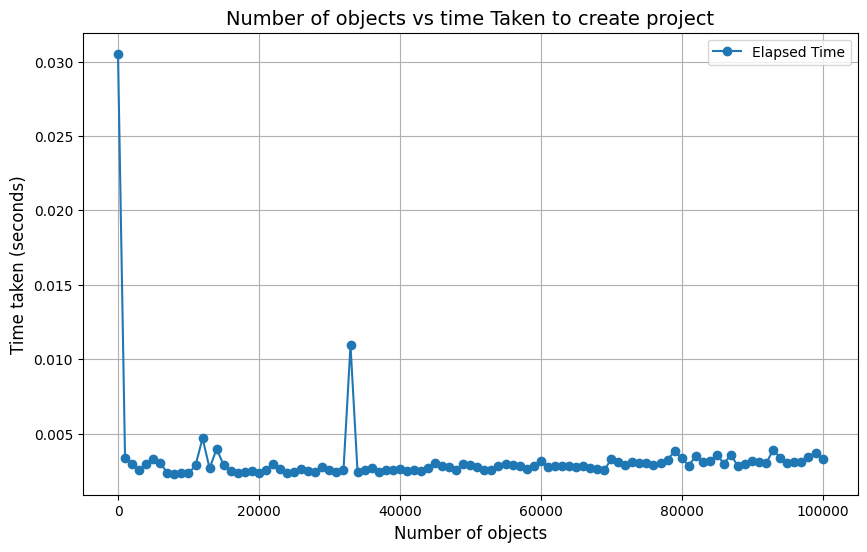

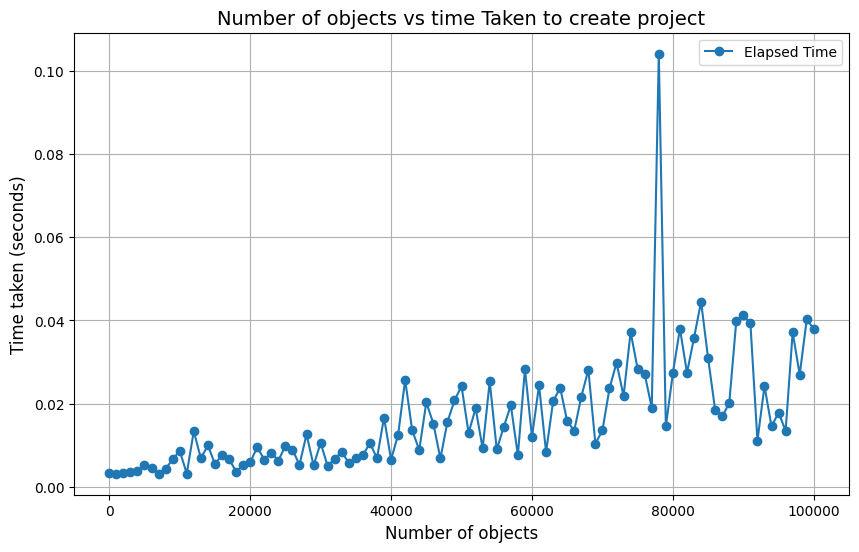

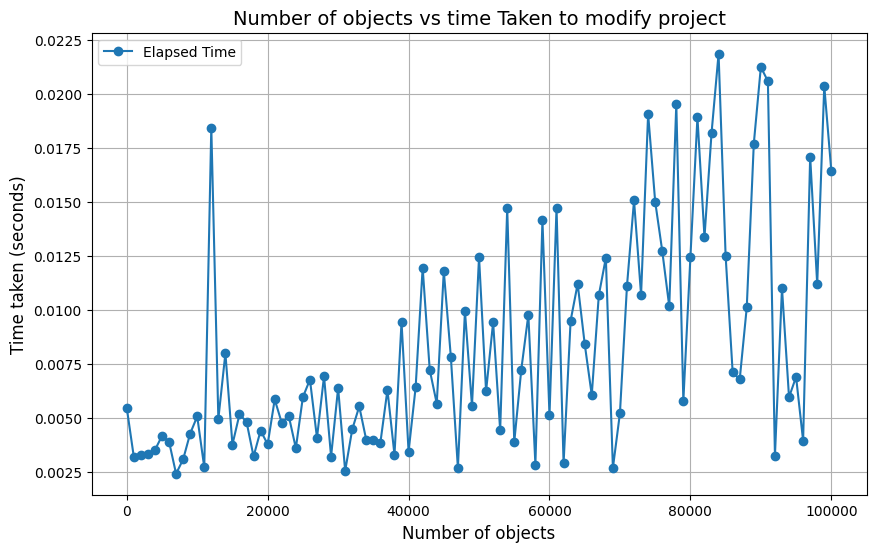

In [16]:
plot_metric(create_project_metric, "create project")
plot_metric(delete_project_metric, "create project")
plot_metric(modify_project_metric, "modify project")

In [ ]:
# CPU & Memory Analysis on Mac
import psutil

def track_system_metrics():
    """Tracks CPU and memory usage."""
    cpu_usage = psutil.cpu_percent(interval=0.1)
    memory = psutil.virtual_memory()
    return cpu_usage, memory.available / (1024 ** 2)  # Return memory in MB


In [ ]:

# Initialize metrics for categories
delete_all_categories()
step = 1000
steps_num = 100000 // step

create_category_metric = []
delete_category_metric = []
modify_category_metric = []
system_metrics = []

for i in range(steps_num + 1):
    # Track system metrics at the start of the loop
    cpu_start, memory_start = track_system_metrics()

    _, _, time_get_categories = get_all_categories()
    category_id, time_create_category = create_category()
    time_modify_category = modify_category(category_id)
    time_delete_category = delete_category(category_id)

    # Track system metrics after the operations
    cpu_end, memory_end = track_system_metrics()

    # Append operation metrics
    create_category_metric.append((time_create_category, step * i))
    delete_category_metric.append((time_delete_category, step * i))
    modify_category_metric.append((time_modify_category, step * i))

    # Append system metrics
    system_metrics.append({
        "step": step * i,
        "cpu_start": cpu_start,
        "cpu_end": cpu_end,
        "memory_start_MB": memory_start,
        "memory_end_MB": memory_end,
    })

    create_random_projects(step - 1)


Step: 0, CPU Start: 18.3%, CPU End: 24.7%, Memory Start: 2412.80 MB, Memory End: 2410.66 MB
Step: 1000, CPU Start: 14.8%, CPU End: 10.0%, Memory Start: 2348.71 MB, Memory End: 2345.57 MB
Step: 2000, CPU Start: 15.2%, CPU End: 26.5%, Memory Start: 2363.71 MB, Memory End: 2361.71 MB
Step: 3000, CPU Start: 19.8%, CPU End: 13.9%, Memory Start: 2385.87 MB, Memory End: 2367.62 MB
Step: 4000, CPU Start: 9.9%, CPU End: 8.8%, Memory Start: 2380.38 MB, Memory End: 2407.30 MB
Step: 5000, CPU Start: 10.1%, CPU End: 9.9%, Memory Start: 2408.87 MB, Memory End: 2409.10 MB
Step: 6000, CPU Start: 14.0%, CPU End: 15.5%, Memory Start: 2769.83 MB, Memory End: 2775.11 MB
Step: 7000, CPU Start: 19.5%, CPU End: 12.0%, Memory Start: 2593.33 MB, Memory End: 2593.49 MB
Step: 8000, CPU Start: 12.2%, CPU End: 12.3%, Memory Start: 2577.38 MB, Memory End: 2577.09 MB
Step: 9000, CPU Start: 41.9%, CPU End: 44.0%, Memory Start: 2169.17 MB, Memory End: 2159.97 MB
Step: 10000, CPU Start: 10.8%, CPU End: 10.1%, Memory St

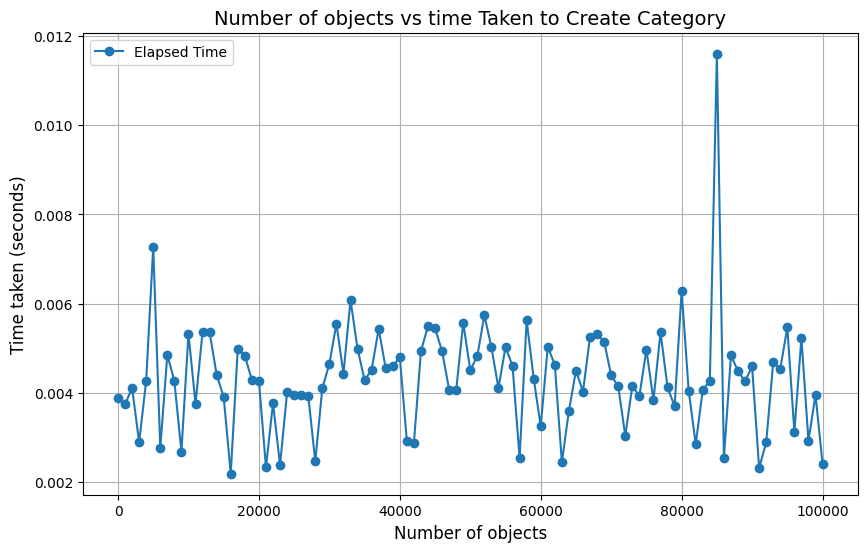

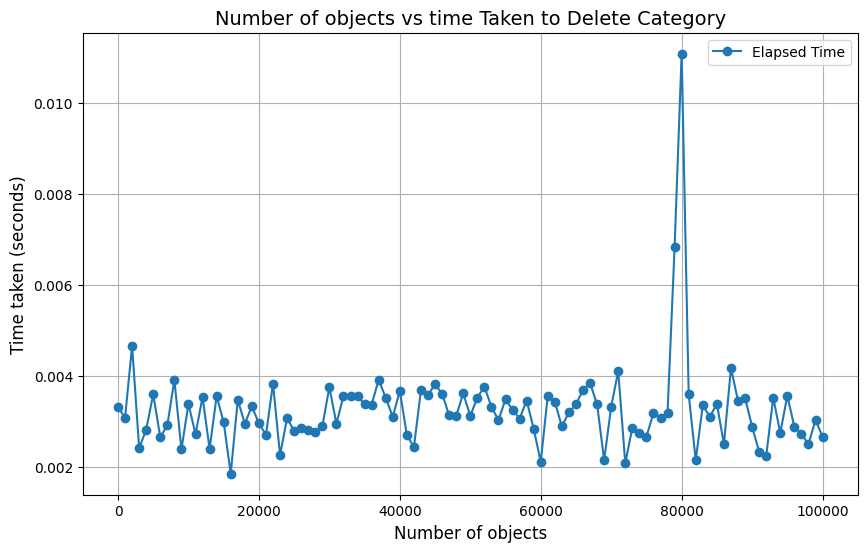

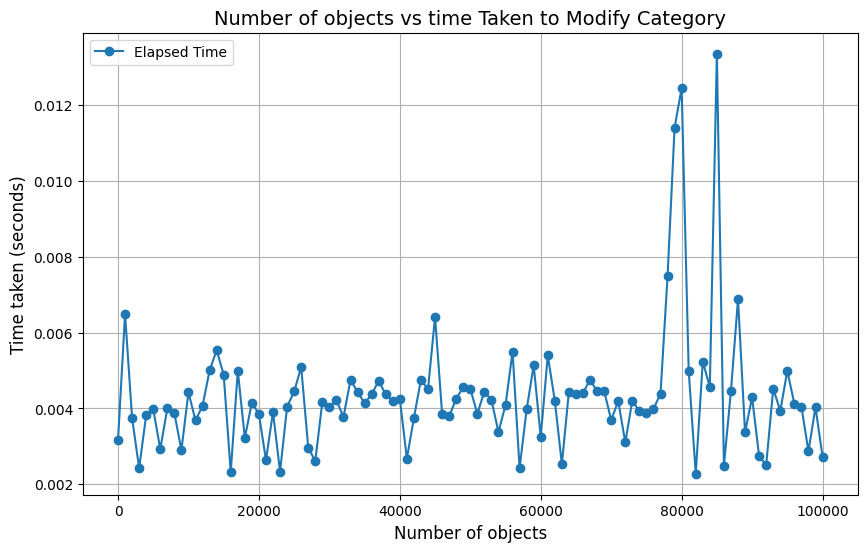

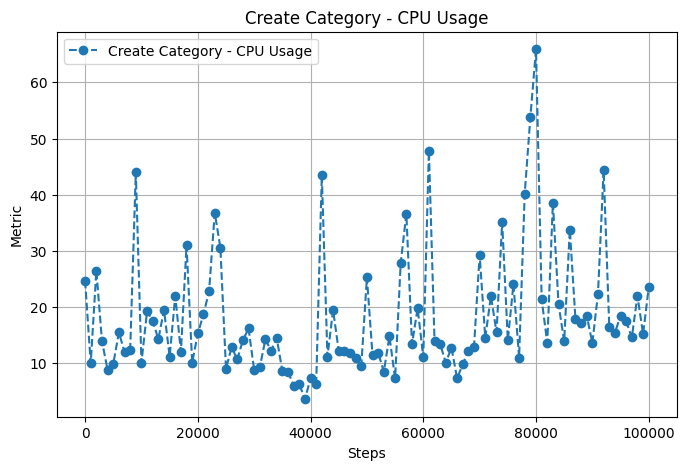

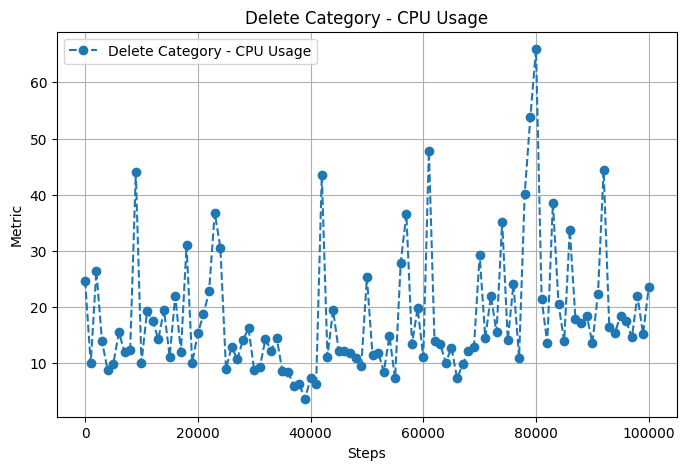

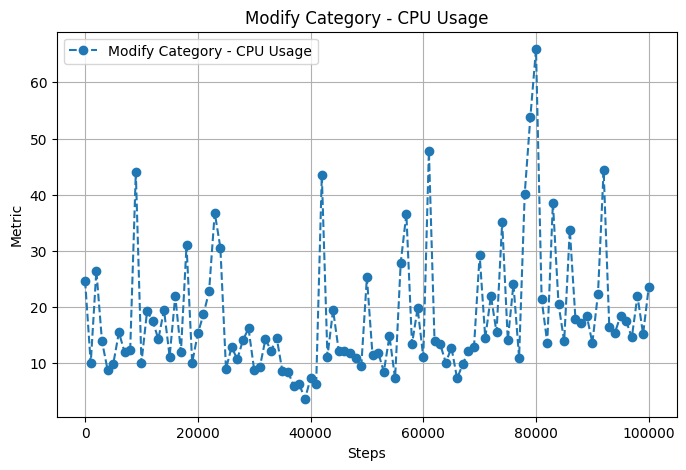

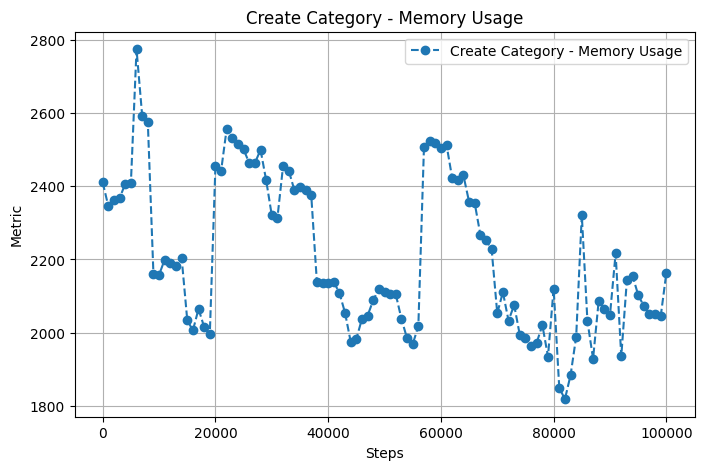

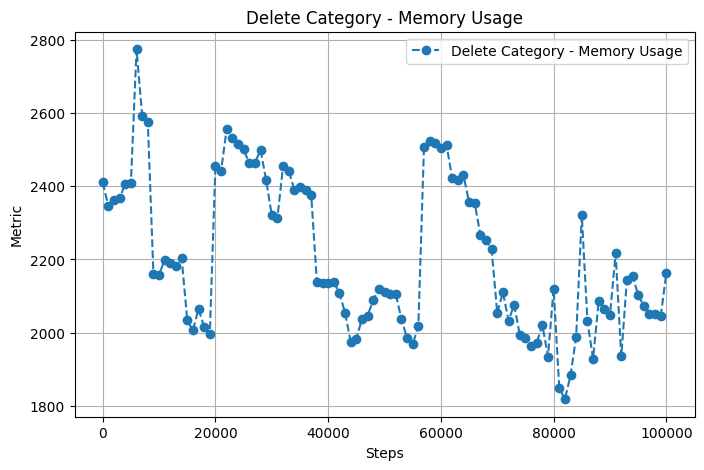

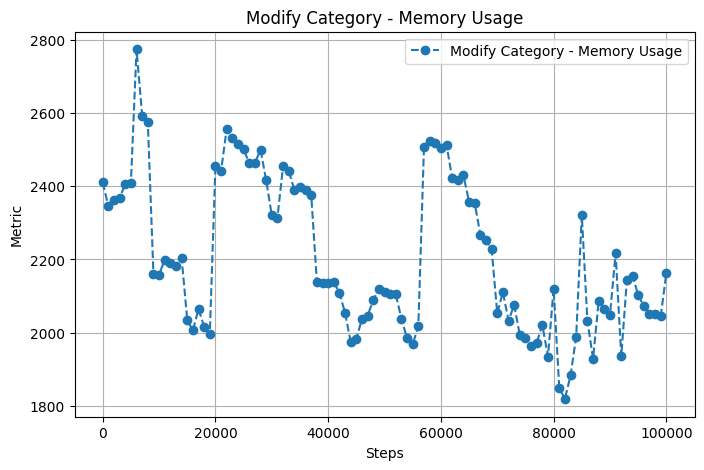

In [23]:

def plot_system_metric(system_metrics, metric_key, title, xlabel="Steps", ylabel="Metric"):
    """Plots CPU or Memory metrics for the given operation."""
    steps = [metric["step"] for metric in system_metrics]
    metric_values = [metric[metric_key] for metric in system_metrics]
    plt.figure(figsize=(8, 5))
    plt.plot(steps, metric_values, label=f"{title}", marker="o", linestyle="--")
    plt.title(f"{title}")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot each metric separately
# 1-3: Operation Times
plot_metric(create_category_metric, "Create Category")
plot_metric(delete_category_metric, "Delete Category")
plot_metric(modify_category_metric, "Modify Category")

# 4-6: CPU Usage
plot_system_metric(system_metrics, "cpu_end", "Create Category - CPU Usage")
plot_system_metric(system_metrics, "cpu_end", "Delete Category - CPU Usage")
plot_system_metric(system_metrics, "cpu_end", "Modify Category - CPU Usage")

# 7-9: Memory Usage
plot_system_metric(system_metrics, "memory_end_MB", "Create Category - Memory Usage")
plot_system_metric(system_metrics, "memory_end_MB", "Delete Category - Memory Usage")
plot_system_metric(system_metrics, "memory_end_MB", "Modify Category - Memory Usage")
